In [ ]:
import numpy as np
import pandas as pd
import os
import glob
import time
import matplotlib.pyplot as plt
import cv2
import seaborn as sns
import shutil
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense, Activation,Dropout,Conv2D, MaxPooling2D,BatchNormalization
from tensorflow.keras.optimizers import Adam, Adamax
from tensorflow.keras.metrics import categorical_crossentropy
from tensorflow.keras import regularizers
from tensorflow.keras.models import Model
from tensorflow.keras import backend as K
import time
import shutil
from keras.models import Sequential
from keras import layers
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Input, Dropout
from tensorflow.keras.optimizers.legacy import Adam, SGD, Adamax

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
train_path = '/content/drive/MyDrive/Colab Notebooks/knee-osteoarthritis-dataset-with-severity/train'
test_path = '/content/drive/My Drive/Colab Notebooks/knee-osteoarthritis-dataset-with-severity/test'
valid_path = '/content/drive/My Drive/Colab Notebooks/knee-osteoarthritis-dataset-with-severity/val'
random_path = '/content/drive/MyDrive/Colab Notebooks/knee-osteoarthritis-dataset-with-severity/random'
list_of_classes=['Healthy', 'Moderate', 'Severe']

In [ ]:
from tensorflow.keras.models import load_model
# Load the best saved model
model1 = load_model('/content/drive/MyDrive/Colab Notebooks/kneeEffNetB5_94.14.h5')
model2 = load_model('/content/drive/MyDrive/Colab Notebooks/DenseNet_93.41.h5')
model3 = load_model('/content/drive/MyDrive/Colab Notebooks/InceptionV3_94.08.h5')
model4 = load_model('/content/drive/MyDrive/Colab Notebooks/MobileNet_93.65.h5')

In [ ]:
file_list = os.listdir(random_path+'/1')
for file_name in file_list:
    file_path = os.path.join(random_path+'/1', file_name)
    os.remove(file_path)




import random
image_file = random.choice(os.listdir("/content/drive/My Drive/Colab Notebooks/knee-osteoarthritis-dataset-with-severity/test/3"))
image_path = os.path.join("/content/drive/My Drive/Colab Notebooks/knee-osteoarthritis-dataset-with-severity/test/3", image_file)

shutil.copy(image_path, random_path+'/1/')

'/content/drive/MyDrive/Colab Notebooks/knee-osteoarthritis-dataset-with-severity/random/1/9188312R.png'

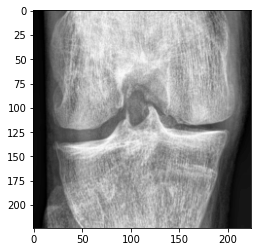

In [ ]:
from PIL import Image
img = Image.open(random_path+'/1/'+image_file)

# display the image using matplotlib
plt.imshow(img, cmap = plt.cm.gray)
plt.show()

In [ ]:
data_gen = ImageDataGenerator()

# Create a data generator for the image
data_generator = data_gen.flow_from_directory(
    directory=random_path,
    target_size=(224, 224),
    batch_size=32,
    class_mode=None,
    shuffle=False
)

Found 1 images belonging to 1 classes.


In [ ]:
preds1=model1.predict(data_generator, verbose=1)

preds2=model2.predict(data_generator, verbose=1)

preds3=model3.predict(data_generator, verbose=1)

preds4=model3.predict(data_generator, verbose=1)

ans = preds1+preds2+preds3+preds4

print("The predicted class for the image is :",list_of_classes[np.argmax(ans)])

1/1 [==============================] - 0s 191ms/step
The predicted class for the image is : Healthy
